# 3.1. Typy wykresów

Posługiwanie się liczbami do opisu modelowanych zjawisk nie jest czasami zbyt intuicyjne. Reprezentacja graficzna danych oraz wyników jest często niezbędnym narzędziem do komunikacji i dość przydatną formą jeśli chodzi o prezentowanie swoich obserwacji osobom z zewnątrz. Na całe szczęście narzędzia, z których korzystamy w toku naszego kursu, ułatwiają generowanie różnego rodzaju wykresów.

## Pandas i matplotlib

Biblioteka pandas jest dość dobrze zintegrowana z matplotlib, jednak aby osiągnąć realną elastyczność, będziemy czasem musieli dokonać pewych adaptacji ręcznie. Podstawowe wizualizacje są jednak dostępne niemal bezwysiłkowo.

In [6]:
import pandas as pd
import numpy as np

### Wykres liniowy

Najprostszym typewm wykresu jest wykres liniowy, który pozwala na ukazanie jak zmienia się wartość danej funkcji w zależności od wzrostu parametru wejściowego, często np. czasu. Zaprezentowanie danych w takiej formie ma sens tylko wtedy gdy pomiędzy wartościami atrybutu istnieje jakiś porządek, czyli są to np. liczby całkowite, naturalne czy właśnie odczyt czasu.

In [7]:
x = np.linspace(0, 2 * np.pi, 1000)

test_df = pd.DataFrame({
    "x": x, 
    "sin_x": np.sin(x)
})
test_df.sample(n=5)

,x,sin_x
326,2.050369,0.887192
126,0.792474,0.712092
704,4.427790,-0.959774
485,3.050395,0.091071
40,0.251579,0.248934


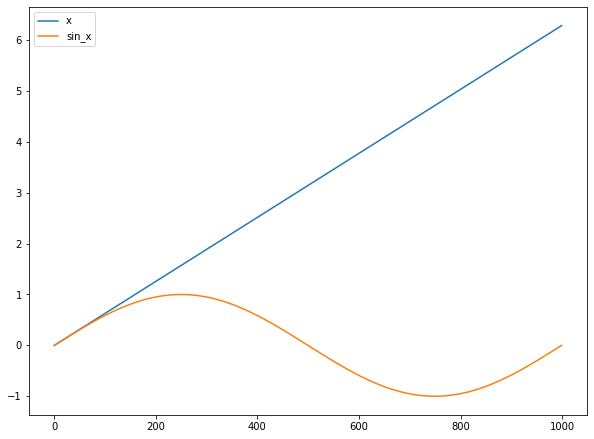

In [10]:
test_df.plot(figsize=(10.0, 7.5))

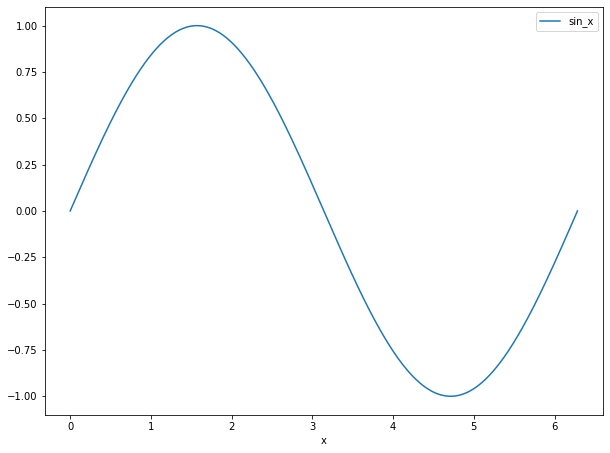

In [9]:
test_df.plot(x="x", y="sin_x", figsize=(10.0, 7.5))

## Zbiór danych "Iris"

Na potrzeby przykładów skorzystamy z popularnego zbioru danych "Iris", który zawiera parametry kilkuset okazów irysów, czyli kwiatów, opisanych za pomocą 4 cech i należących do 3 różnych podgatunków.

In [3]:
iris_df = pd.read_csv(
    "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
)
iris_df.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species
62,6.0,2.2,4.0,1.0,versicolor
67,5.8,2.7,4.1,1.0,versicolor
108,6.7,2.5,5.8,1.8,virginica
4,5.0,3.6,1.4,0.2,setosa
76,6.8,2.8,4.8,1.4,versicolor


In [4]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Wizualizacja atrybutów

Cztery cechy wydają się być dość niewielką liczbą, jednak ciężko sobie wyobrazić pojedynczą wizualizację, która pokazałaby wszystkie 4 wymiary naraz. Trójwymiarowe formy prezentacji są czasem dość ciężkie do interpretacji, jednak dopuszczalne. Typowo jednak ograniczamy się do jednego bądź dwóch wymiarów i tworzymy wiele kombinacji par zmiennych, aby uchwycić ich wzajemne relacje.

### Wykresy punktowe

Przydatną formą prezentacji jest zrzutowanie dwóch wybranych cech na płaszczyznę, żeby zaobserwować wzajemne zalezności pomiędzy nimi.

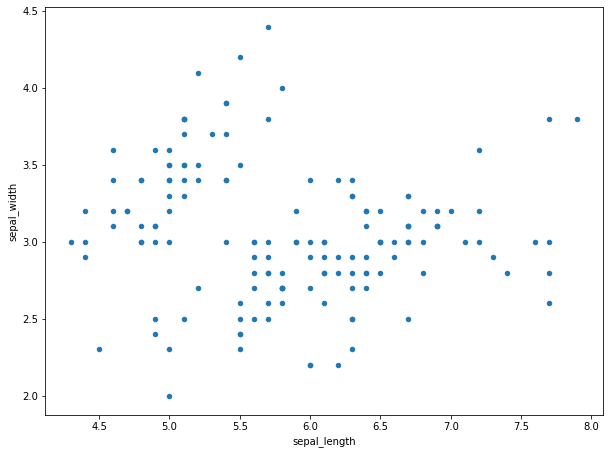

In [12]:
iris_df.plot.scatter(x="sepal_length", y="sepal_width", 
                     figsize=(10.0, 7.5))

In [43]:
colors, mapping = pd.factorize(iris_df["species"])
colors, mapping

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64),
 Index(['setosa', 'versicolor', 'virginica'], dtype='object'))

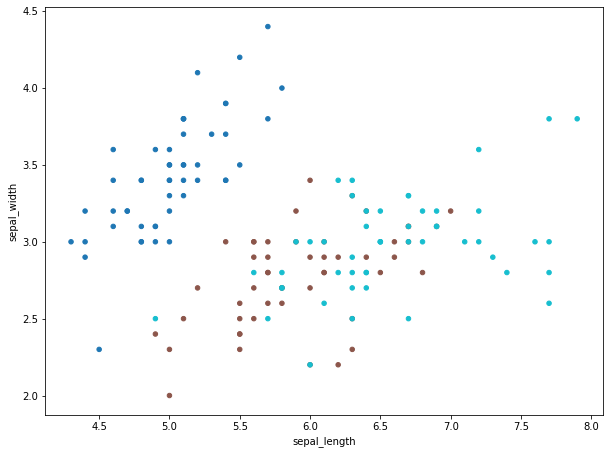

In [93]:
iris_df.plot.scatter(x="sepal_length", y="sepal_width", 
                     c=colors, cmap="tab10", colorbar=False,
                     figsize=(10.0, 7.5))

### Wykresy słupkowe

Tego rodzaju wizualizacja przydaje się w momencie porównania różnych wartości w obrębie podgrup. Np. jeśli chcemy zobaczyć jak wyglądają wartości średnie poszczególnych cech dla każdej z klas, to możemy przeprowadzić grupowanie.

In [48]:
iris_df.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


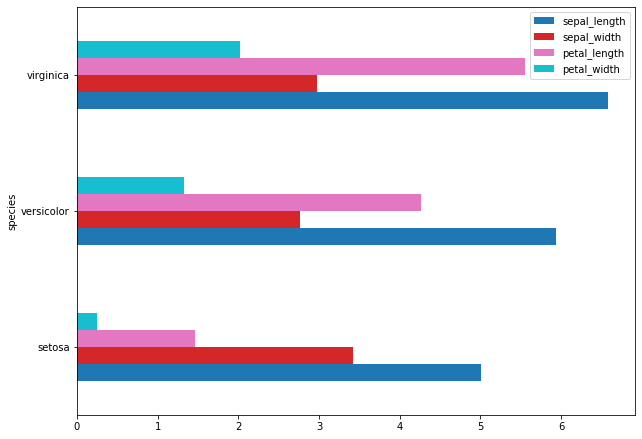

In [52]:
iris_df.groupby("species") \
    .mean() \
    .plot.barh(cmap="tab10", 
               figsize=(10.0, 7.5))

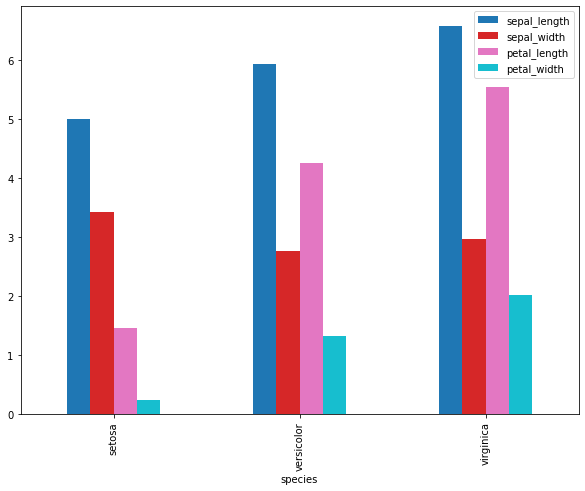

In [51]:
iris_df.groupby("species") \
    .mean() \
    .plot.bar(cmap="tab10", 
              figsize=(10.0, 7.5))

### Histogram i rozkład gęstości

Rozpatrywanie pojedynczych cech oraz ich rozkładów może zostać przeprowadzony za pomocą histogramu oraz rozkładu gęstości. Kształt histogramu zależy od ilości wybranych przedziałów, a gęstość trochę lepiej ujmuje rzeczywisty rozkład.

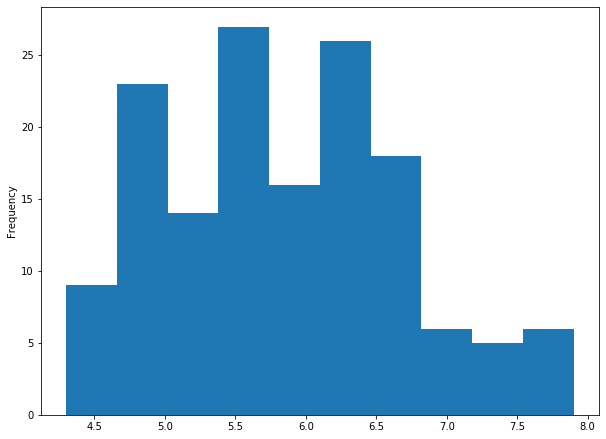

In [55]:
iris_df["sepal_length"] \
    .plot.hist(bins=10, figsize=(10.0, 7.5))

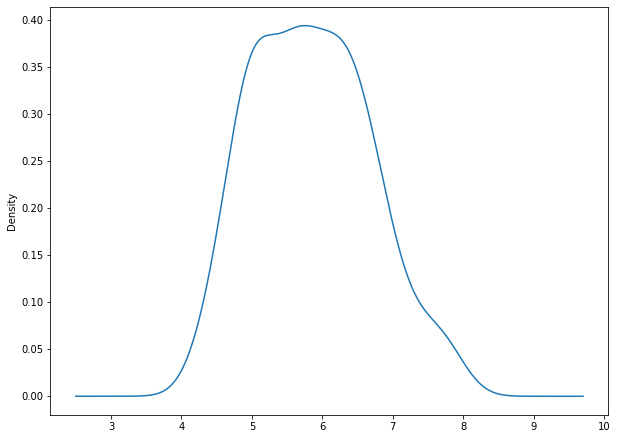

In [56]:
iris_df["sepal_length"] \
    .plot.density(figsize=(10.0, 7.5))

### Wykres sześciokątny

Ten rodzaj wykresu jest dość ciekawą alternatywą dla histogramu i wykresu punktowego. Jeśli mamy dane w dwóch wymiarach, ale punktów w zbiorze jest zbyt dużo aby rysować każdy z osobna, to warto skorzystać z tej formy prezentacji.

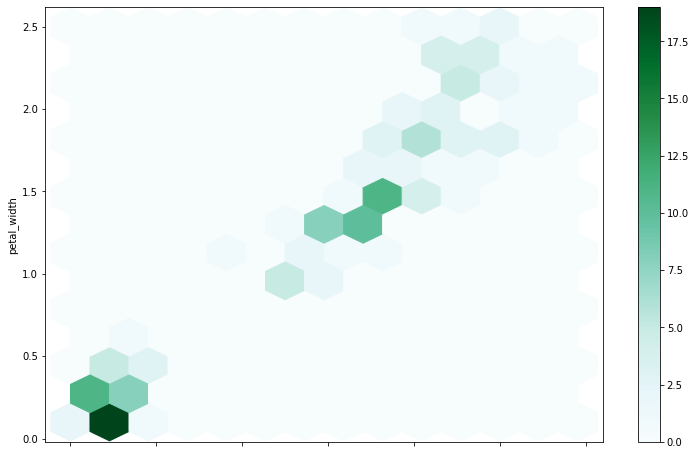

In [88]:
iris_df.plot.hexbin(x="petal_length", y="petal_width", 
                    figsize=(12.5, 8.0), gridsize=(13, 7))

### Wykres kołowy

Wykresy kołowe są dość częstym wyborem, chociaż czasami są wręcz nadużywane. Szczególnie skorzystanie z trójwymiarowej wersji może nastręczać problemów w interpretacji. Szczególnie używane są one w przypadku danych kategorycznych, aby zaprezentować rozkład dyskretny wartości.

In [94]:
iris_df["species"].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

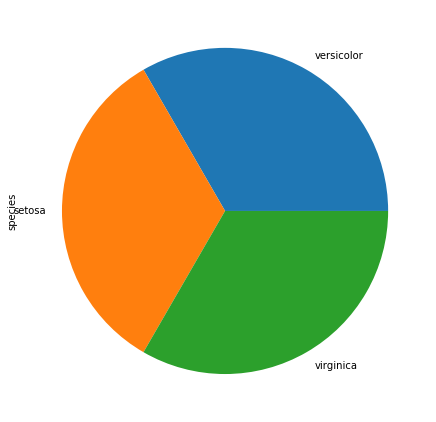

In [95]:
iris_df["species"].value_counts() \
    .plot.pie(figsize=(10.0, 7.5))

### Wykres pudełkowy

Ostatnim omawianym typem będzie wykres pudełkowy (ang. *boxplot*). Dzięki jego wykorzystaniu jesteśmy w stanie uchwycić rozkład pojedynczych cech, a także obecność tzw. outlierów czyli punktów danych odstajacych od reszty zbioru.

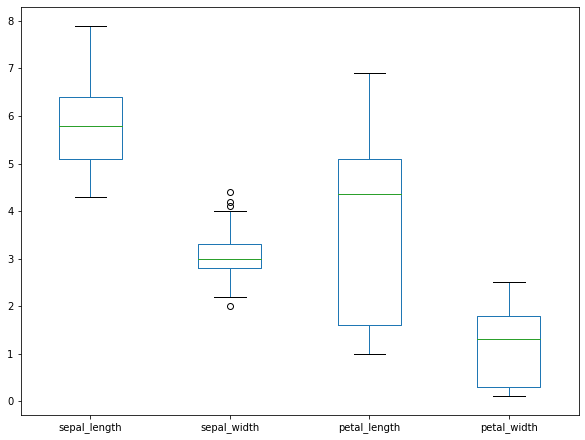

In [76]:
iris_df.plot.box(figsize=(10.0, 7.5))

species
setosa        AxesSubplot(0.125,0.125;0.775x0.755)
versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
virginica     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

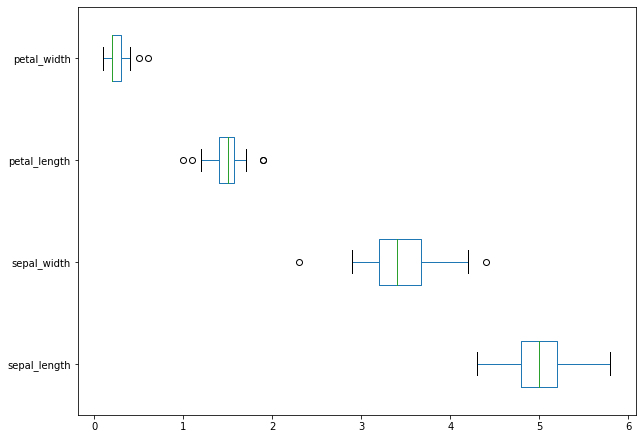

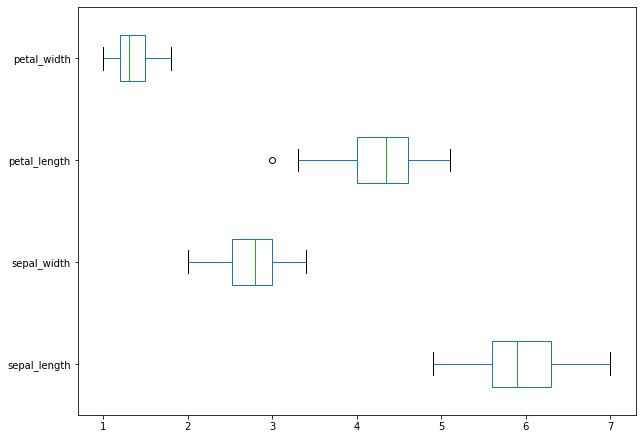

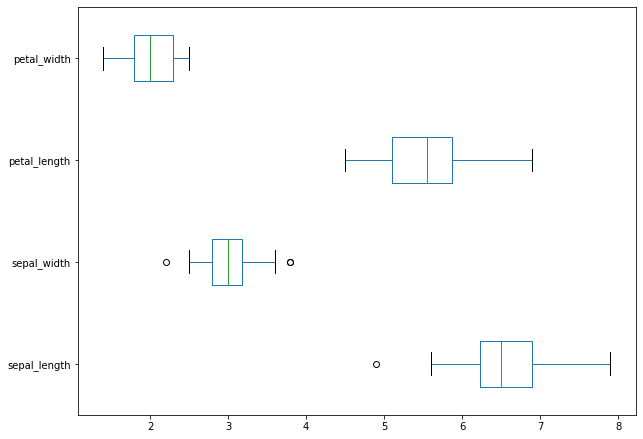

In [87]:
iris_df.groupby("species") \
    .plot.box(figsize=(10.0, 7.5), vert=False)